<a href="https://colab.research.google.com/github/velliyangiri07/ML-projects/blob/main/statistics2_Using_Restaurant_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('Data.csv')
df

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-09-19,2023-09-19 22:03:44,28389,Kulcha,55.0,1.0,55.0,0.0,2.76,57.76,16,biller,0,NaN,Indian Breads,NaN
1,2023-09-19,2023-09-19 22:03:44,28389,Parota,30.0,4.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Indian Breads,NaN
2,2023-09-19,2023-09-19 22:03:44,28389,Mushroom Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
3,2023-09-19,2023-09-19 22:03:44,28389,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
4,2023-09-19,2023-09-19 22:03:44,28389,Gobi- 65,120.0,1.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Veg Starters,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7237,2023-07-01,2023-07-01 15:17:24,26194,Lemon Soda,50.0,1.0,50.0,0.0,2.50,52.50,3,biller,0,NaN,Deserts & Mocktails,NaN
7238,2023-07-01,2023-07-01 15:17:24,26194,Mineral Water,20.0,1.0,20.0,0.0,1.00,21.00,3,biller,0,NaN,Deserts & Mocktails,NaN
7239,2023-07-01,2023-07-01 13:12:54,26193,Lemon Soda,50.0,3.0,150.0,0.0,7.50,157.50,10,biller,0,NaN,Deserts & Mocktails,NaN
7240,2023-07-01,2023-07-01 13:08:33,26192,Oreo Milk Shake,120.0,1.0,120.0,0.0,6.00,126.00,4,biller,0,NaN,Deserts & Mocktails,NaN


# date with the highest average bill amount

In [ ]:
df.groupby('Date')['Final Total'].mean().sort_values(ascending=False).head(1)

,Final Total
Date,
2023-07-19,319.837857


# total number of customer Bill transactions

In [ ]:
df['Invoice No.'].nunique()

2199

# highest-selling item (by quantity) in the month of September

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
sep_month=df[df['Timestamp'].dt.month == 9]
sep_month.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False).head(1)

,Qty.
Item Name,
Chicken Biriyani With Raitha And Gravy,268.0


# 3 least-selling categories in July And Bar Char for This

In [ ]:
import matplotlib.pyplot as plt
a=df[df['Timestamp'].dt.month == 7].groupby('Category')['Qty.'].sum().sort_values(ascending=True).head(3)
a

,Qty.
Category,
NON VEG STARTERS FISH,49.0
NON VEG STARTERS EGG,53.0
Veg Soup,53.0


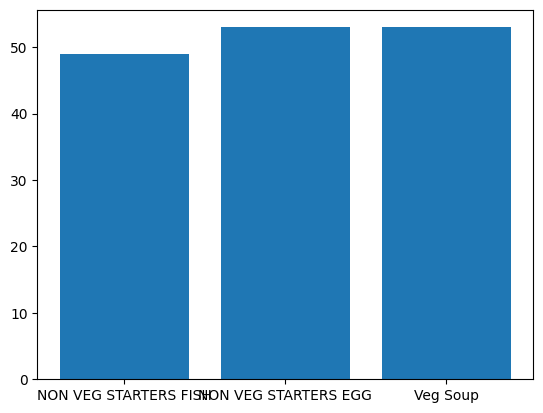

In [ ]:
plt.bar(a.index,a.values)
plt.show()

# total sales amount for each category And Pie Chart for This

In [ ]:
a=df.groupby('Category')['Final Total'].sum()
a

,Final Total
Category,
Deserts & Mocktails,51517.47
Indian Breads,117623.56
NON VEG BRIYANI & RICE,379502.88
NON VEG STARTERS CHICKEN,190550.96
NON VEG STARTERS EGG,7272.36
NON VEG STARTERS FISH,37488.48
NON VEG STARTERS MUTTON,250.96
Non Veg Gravy,122743.76
Non Veg Soup,27721.66


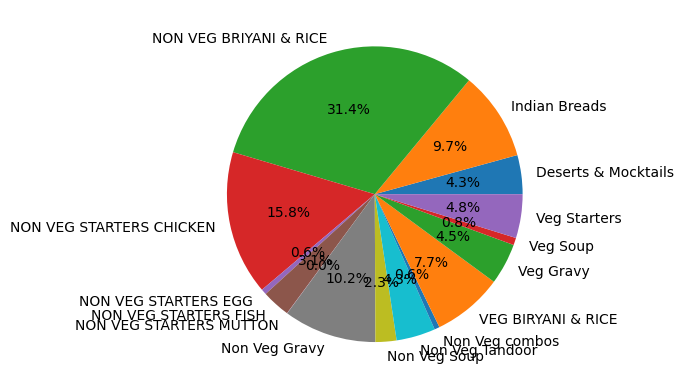

In [ ]:
plt.pie(a.values,labels=a.index,autopct='%1.1f%%')
plt.show()